In [1]:
from utils import CNC
from types import SimpleNamespace

In [2]:
args = SimpleNamespace(
    file_path = "./data/data.csv",
    model = "naive_bayes",
    future_steps = 1,
    window_size = 1,
    test_size = 200,
    seed = 0
)
cnc = CNC(args)

In [21]:
cnc.pre_process()

Creating rolling window features: 100%|██████████| 1213/1213 [00:00<00:00, 2658.67it/s]


In [23]:
cnc.train()

Training models: 100%|██████████| 1/1 [00:00<00:00, 667.46it/s]


In [24]:
cnc.evaluate()

Report - Future step 1:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       195
        True       0.00      0.00      0.00         5

    accuracy                           0.97       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.95      0.97      0.96       200



d:\Anaconda3\envs\cnc\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda3\envs\cnc\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda3\envs\cnc\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


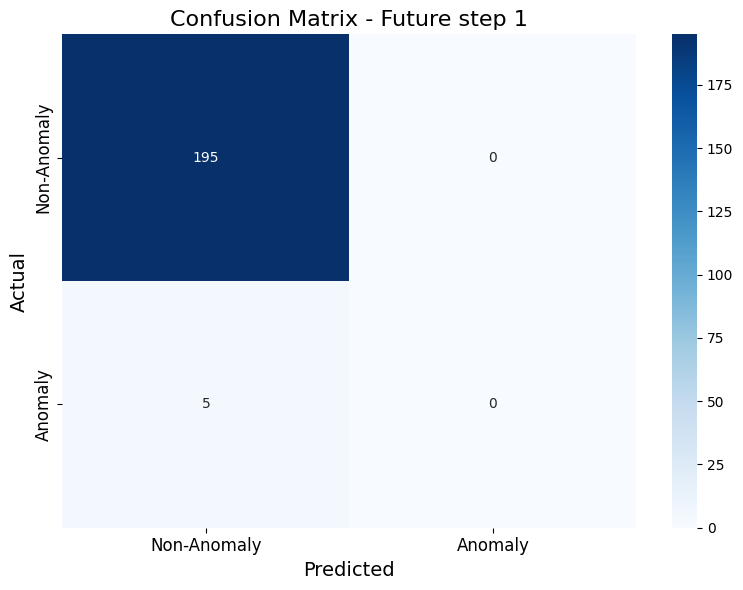

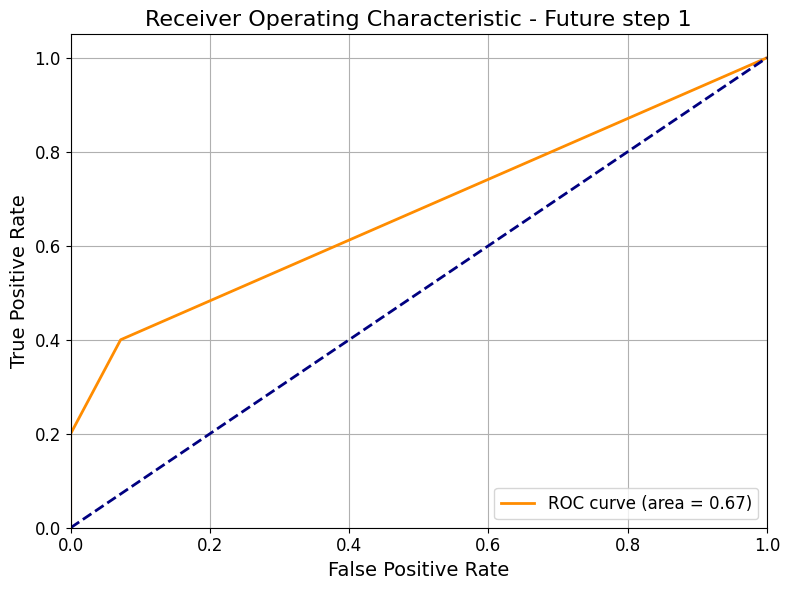

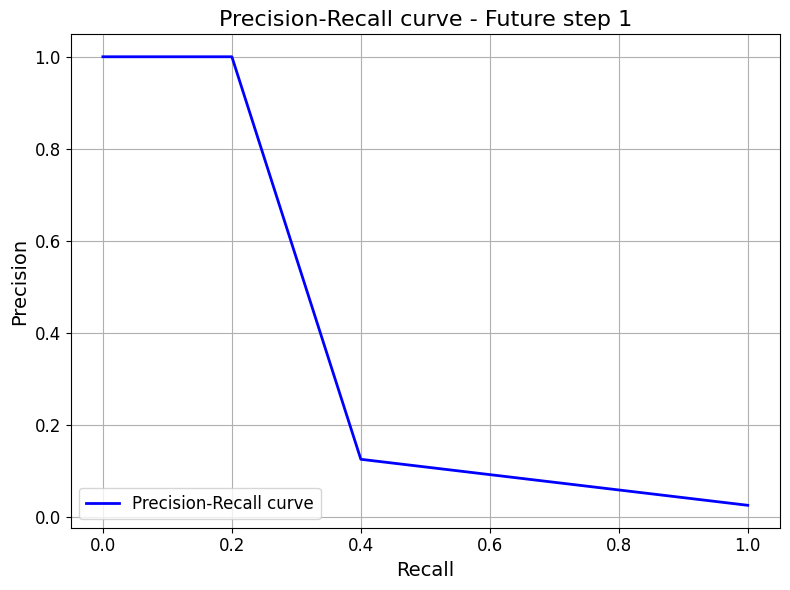

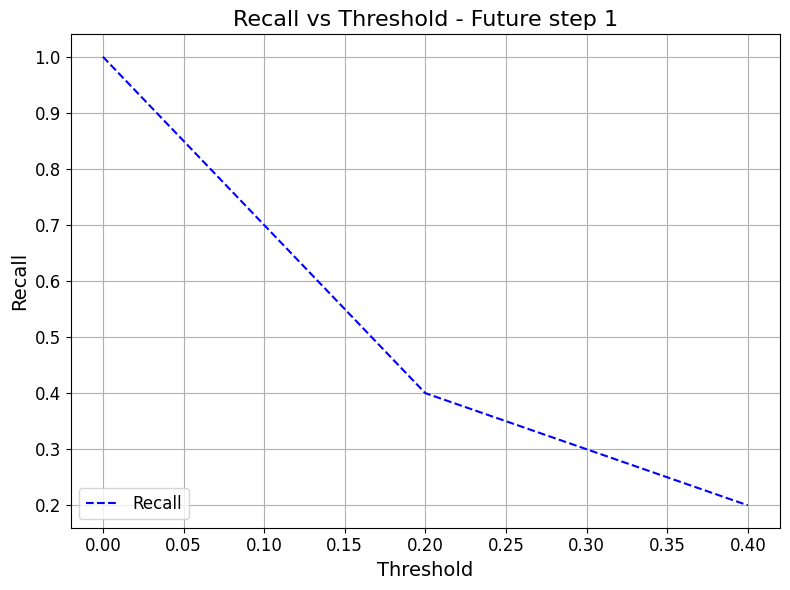

In [25]:
cnc.visualize()